Hypothesis: Determine how the California real estate market has been affected by the national interest rate

- L/C Price - needs to get converted to integer
- Contract Status Change Date - needs to be converted to date / time
- Convert LSqft/Ac	- convert to integer
- Seperate Bed/Bath by commas
- 

    

import pandas as pd
import numpy as np
pd.read_csv("Resources/")
real_estate_pd = pd.read_csv("Resources/California_Real_Estate_Raw_Data_Set.csv")
real_estate_pd.head()
real_estate_pd.columns
real_estate_pd['County '].astype(str).astype(int)
CA_real_estate_df = real_estate_pd
CA_real_estate_df
CA_real_estate_df = int(CA_real_estate_df)

## To do:
Interest Rates per month
Hypothesis testing
Analyze the data showing the 

In [ ]:
#My Notes
#How has the CA real estate market been affected by the increase in interest rates
# import pandas as pd
# import numpy as np
# import datetime as dt
# real_estate_pd = pd.read_csv("Resources/California_Real_Estate_Raw_Data_Set.csv")
# real_estate_pd.head()
# real_estate_pd.columns
# real_estate_pd['County '].astype(str).astype(int)
# ca_real_estate = real_estate_pd[["Listing ID","City","L/C Price","County"]]
# ca_real_estate.head()
# CA_real_estate_df = real_estate_pd
# CA_real_estate_df
# CA_real_estate_df = int(CA_real_estate_df)
#ca_real_estate_sorted_df_JM = ca_real_estate_sorted_df[(ca_real_estate_sorted_df.Date >= "2018-08-15") & (ca_real_estate_sorted_df.Date <= "2019-05-31")]
#import datetime as dt
#ca_real_estate_sorted_df.Date[(ca_real_estate_sorted_df.Date.dt.month == 9) & (ca_real_estate_sorted_df.Date.dt.year == 2019)].value_counts().sum()
#ca_real_estate_sorted_df['Date'].value_counts().hist()
#ca_real_estate_sorted_df['Date'].groupby([ca_real_estate_sorted_df["Date"].dt.year,ca_real_estate_sorted_df["Date"].dt.month]).count().plot(kind="bar")
#ca_real_estate_sorted_df = ca_real_estate_df.sort_values(by='Date')
#ca_real_estate_sorted_df.Date
#ca_real_estate_sorted_df.info()

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


In [2]:
pd.set_option('display.max_columns', 30)

In [3]:
#Closed Prices_Raw_Date
ca_real_estate = pd.read_csv("Resources/California_Real_Estate_Raw_Data_Set.csv")
#Current Prices_Raw_Date
current_prices = pd.read_csv("Resources/Current_prices.csv")

In [4]:
#Closed Prices
ca_real_estate_df = ca_real_estate
#Current Prices
current_market_df = current_prices

In [5]:
#Closed Prices_Renaming Columns
ca_real_estate_df.rename(columns = {"Contract Status Change Date": "Date"}, inplace = True)
#Current Prices_Renaming Columns
current_market_df.rename(columns = {"Contract Status Change Date": "Date"}, inplace = True)

In [6]:
#Closed Prices_Changed Date Format
ca_real_estate_df.Date = pd.to_datetime(ca_real_estate_df.Date, format = "%m/%d/%y")
#Current Prices_Changed Date Format
current_market_df.Date = pd.to_datetime(current_market_df.Date, format = "%m/%d/%y")

In [7]:
#Closed Prices_Added Month Column
ca_real_estate_df["month"] = ca_real_estate_df.Date.dt.month
#Current Prices_Added Month Column
current_market_df['month'] = current_market_df.Date.dt.month

In [8]:
#Closed Prices_Added Year Column
ca_real_estate_df["Year"] = ca_real_estate_df.Date.dt.year
#Current Prices_Added Year Column
current_market_df['Year'] = current_market_df.Date.dt.year

In [9]:
#Closed Prices_Changed Sqft Column
ca_real_estate_df[['Price Per Square Foot']] = ca_real_estate_df[['Price Per Square Foot']].replace('[\$,]','',regex=True).astype(float)
#Current Prices_Changed Sqft Column
current_market_df[['Price Per Square Foot']] = current_market_df[['Price Per Square Foot']].replace('[\$,]','',regex=True).astype(float)

In [10]:
#Closed Prices_Object to Float
ca_real_estate_df[['L/C Price']] = ca_real_estate_df[['L/C Price']].replace('[\$,]','',regex=True).astype(float)
#Current Prices_Object to Float
current_market_df[['L/C Price']] = current_market_df[['L/C Price']].replace('[\$,]','',regex=True).astype(float)

In [11]:
#Closed Prices_Drop column
ca_real_estate_df[["Sqft"]] = ca_real_estate_df.Sqft.str.split('/', expand=True).drop([1], axis = 1)
#Current Prices_Drop column
current_market_df[['Sqft']] = current_market_df.Sqft.str.split('/', expand=True).drop([1], axis = 1)

In [12]:
ca_real_estate_df[["YrBuilt"]] = ca_real_estate_df.YrBuilt.str.split('/', expand=True).drop([1], axis = 1)
current_market_df[['YrBuilt']] = current_market_df.YrBuilt.str.split('/', expand=True).drop([1], axis = 1)

In [13]:
#fix bathroom into a float
#Closed Prices
ca_real_estate_df[["Bed & Bath", "A", "B", "C"]] = ca_real_estate_df['Br/Ba'].str.split(",", expand = True)
ca_real_estate_df[["Bed", "Bath"]] = ca_real_estate_df["Bed & Bath"].str.split("/", expand = True)
#Current Prices
current_market_df[["Bed & Bath", "A", "B", "C"]] = current_market_df['Br/Ba'].str.split(",", expand = True)
current_market_df[["Bed", "Bath"]] = current_market_df["Bed & Bath"].str.split("/", expand = True)


In [14]:
#Closed Prices_Dropped Columns
ca_real_estate_df = ca_real_estate_df.drop(columns = ['Bed & Bath'])
#Current Prices_Dropped Columns
current_market_df = current_market_df.drop(columns = ['Bed & Bath'])


In [15]:
#Closed Prices - Rename Sqft.
ca_real_estate_df.rename(columns = {"Sqft": "Sqft/A"}, inplace = True)
ca_real_estate_df[["LSqft", "Ac"]] = ca_real_estate_df['LSqft/Ac'].str.split('/', expand = True).replace('[\$,]','',regex=True).astype(float)

#Current Prices - Rename Sqft.
current_market_df.rename(columns = {"Sqft": "Sqft/A"}, inplace = True)
current_market_df[["LSqft", "Ac"]] = current_market_df['LSqft/Ac'].str.split('/', expand = True).replace('[\$,]','',regex=True).astype(float)

In [16]:
#Closed Prices
sales_data_month_df = ca_real_estate_df.loc[:,["Listing ID", "L/C Price", "month", "County " ]]
current_market = current_market_df.loc[:,["Listing ID", "L/C Price", "month", "County"]]

In [17]:
#sales_data_month_df.month.unique()
# Jan_df = sales_data_month_df[sales_data_month_df["month"] == 1.]
# Feb_df = sales_data_month_df[sales_data_month_df["month"] == 2.]
# March_df = sales_data_month_df[sales_data_month_df["month"] == 3.]
# April_df = sales_data_month_df[sales_data_month_df["month"] == 4.]
# May_df = sales_data_month_df[sales_data_month_df["month"] == 5.]
# June_df = sales_data_month_df[sales_data_month_df["month"] == 6.]

In [18]:
#Closed Prices
July_df = sales_data_month_df[sales_data_month_df["month"] == 7.]
August_df = sales_data_month_df[sales_data_month_df["month"] == 8.]
Sept_df = sales_data_month_df[sales_data_month_df["month"] == 9.]

#Current Prices
current_July_df = current_market[current_market['month'] == 7.]
current_August_df = current_market[current_market['month'] == 8.]
current_September_df = current_market[current_market['month'] == 9.]

In [19]:
#Closed Prices
ttest_ind(July_df['L/C Price'], Sept_df['L/C Price'])

Ttest_indResult(statistic=18.562720974798353, pvalue=5.320017767949999e-76)

In [20]:
#Current Listed Prices
ttest_ind(current_July_df['L/C Price'], current_September_df['L/C Price'])

Ttest_indResult(statistic=4.997865212120273, pvalue=6.003407022864367e-07)

In [21]:
# Closed Prices
orange_county = sales_data_month_df[sales_data_month_df['County '] == "Orange"]
Riverside_county = sales_data_month_df[sales_data_month_df['County '] == "Riverside"]
LA_county = sales_data_month_df[sales_data_month_df['County '] == "Los Angeles"]

# Current Listed Prices
current_oc = current_market[current_market['County']=="Orange"]
current_la = current_market[current_market['County']=="Los Angeles"]
current_riverside = current_market[current_market['County']=="Riverside"]

In [22]:
orange_county.head()

,Listing ID,L/C Price,month,County
0,PW19179972,1070000.0,9.0,Orange
1,PW19150297,1299000.0,8.0,Orange
2,OC19161923,590000.0,8.0,Orange
3,OC19194337,679000.0,9.0,Orange
4,OC19155053,715000.0,8.0,Orange


In [23]:
orange_closed_average = orange_county.groupby(['County ', 'month']).mean()
la_closed_average = LA_county.groupby(['County ', 'month']).mean()
riverside_closed_average = Riverside_county.groupby(['County ', 'month']).mean()
orange_closed_average

L/C Price
County  month               
Orange  5.0    898127.404255
        6.0    840646.203333
        7.0    836414.490964
        8.0    828147.472422
        9.0    846740.221239

In [24]:
# Closed Prices
LA_July = LA_county[LA_county['month'] == 7.]
LA_August = LA_county[LA_county['month'] == 8.]
LA_September = LA_county[LA_county['month'] == 9.]

# Closed Prices Merged DataFrame LA County
summer_closed_LA = LA_July.append(LA_August, ignore_index = True)
summer_closed_LA = summer_closed_LA.append(LA_September, ignore_index = True)

# Current Listed Prices
currentLA_July = current_la[current_la['month']==7.]
currentLA_August = current_la[current_la['month']==8.]
currentLA_Sept = current_la[current_la['month']==9.]

# Current Listed Merged DataFrame LA County
summer_current_LA = currentLA_July.append(currentLA_August, ignore_index = True)
summer_current_LA = summer_current_LA.append(currentLA_Sept, ignore_index = True)

In [25]:
# Closed Prices
Orange_July = orange_county[orange_county['month'] == 7.]
Orange_August = orange_county[orange_county['month'] == 8.]
Orange_September = orange_county[orange_county['month'] == 9.]

# Closed Prices Merged DataFrame Orange County
summer_closed_OC = Orange_July.append(Orange_August, ignore_index = True)
summer_closed_OC = summer_closed_OC.append(Orange_September, ignore_index = True)

# Current Listed Prices
currentOC_July = current_oc[current_oc['month']== 7.]
currentOC_August = current_oc[current_oc['month']== 8.]
currentOC_Sept = current_oc[current_oc['month']== 9.]

# Current Listed Merged DataFrame Orange County
summer_current_OC = currentOC_July.append(currentOC_August, ignore_index = True)
summer_current_OC = summer_current_OC.append(currentOC_Sept, ignore_index = True)


In [26]:
# Closed Prices
Riverside_county_July = Riverside_county[Riverside_county['month'] == 7.]
Riverside_county_August = Riverside_county[Riverside_county['month'] == 8.]
Riverside_county_September = Riverside_county[Riverside_county['month'] == 9.]

# Closed Prices Merged DataFrame Riverside County
summer_closed_RC = Riverside_county_July.append(Riverside_county_August, ignore_index = True)
summer_closed_RC = summer_closed_RC.append(Riverside_county_September, ignore_index = True)


# Current Listed Prices
current_riverside_July = current_riverside[current_riverside['month']==7.]
current_riverside_August = current_riverside[current_riverside['month']==8.]
current_riverside_September = current_riverside[current_riverside['month']==9.]

# Current Listed Merged DataFrame Riverside County
summer_current_RC = current_riverside_July.append(current_riverside_August, ignore_index = True)
summer_current_RC = summer_current_RC.append(current_riverside_September, ignore_index = True)

In [27]:
Riverside_county_August.head()

,Listing ID,L/C Price,month,County
9639,EV19204795,234900.0,8.0,Riverside
9641,SW19206422,329500.0,8.0,Riverside
9648,DW19204094,400000.0,8.0,Riverside
9659,PW19204937,455000.0,8.0,Riverside
9697,SW19219369,539909.0,8.0,Riverside


In [28]:
ttest_ind(Riverside_county_July['L/C Price'], Riverside_county_August['L/C Price'])

Ttest_indResult(statistic=2.003852052335435, pvalue=0.045238315410216105)

In [29]:
ttest_ind(Riverside_county_August['L/C Price'], Riverside_county_September['L/C Price'])

Ttest_indResult(statistic=0.30246401472707696, pvalue=0.7623122543211315)

In [30]:
ttest_ind(Riverside_county_July['L/C Price'], Riverside_county_September['L/C Price'])

Ttest_indResult(statistic=2.5243677460803093, pvalue=0.011634465377513578)

In [31]:
LA_county.head()

,Listing ID,L/C Price,month,County
3778,SB19174831,906000.0,8.0,Los Angeles
3779,PW19160887,908000.0,9.0,Los Angeles
3780,OC19160144,1035000.0,9.0,Los Angeles
3781,PV19160104,1099900.0,9.0,Los Angeles
3782,PW19195408,1276000.0,9.0,Los Angeles


In [35]:
ttest_ind(LA_July['L/C Price'], LA_August['L/C Price'])

Ttest_indResult(statistic=0.3852604381818285, pvalue=0.7000715473909171)

In [36]:
ttest_ind(LA_August['L/C Price'], LA_September['L/C Price'])

Ttest_indResult(statistic=0.6544382122427264, pvalue=0.5128696349155442)

In [37]:
ttest_ind(LA_July['L/C Price'], LA_September['L/C Price'])

Ttest_indResult(statistic=0.9641471110255895, pvalue=0.3350516335231587)

In [38]:
# Interest Rate Data

interest_rates = {'Date': ['January 2019', 'February 2019', 'March 2019', 'April 2019', 'May 2019','June 2019','July 2019', 'Augutst 2019', 'September 2019'], 
                 'Level(%)': [2.25,2.25,2.25,2.25,2.25,2.25,2.25, 2.00, 1.75]}

In [39]:
# Interest Rate DataFrame
interest_rates_df = pd.DataFrame(interest_rates)

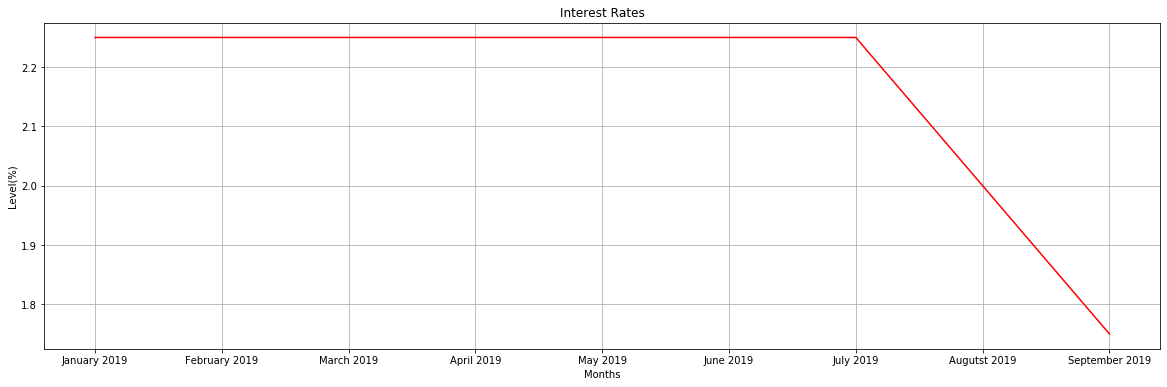

In [40]:
# Interest Rate Graph 2019
figure(num=None, figsize=(20,6))
plt.plot(interest_rates_df['Date'], interest_rates_df['Level(%)'], color = "red")
plt.title("Interest Rates")
plt.xlabel("Months")
plt.ylabel("Level(%)")
plt.grid()

In [50]:
LA_Closed_df = summer_closed_LA.groupby(['County ', 'month']).mean().reset_index()
LA_Closed_df

,County,month,L/C Price
0,Los Angeles,7.0,673617.971041
1,Los Angeles,8.0,669540.671867
2,Los Angeles,9.0,663527.938831


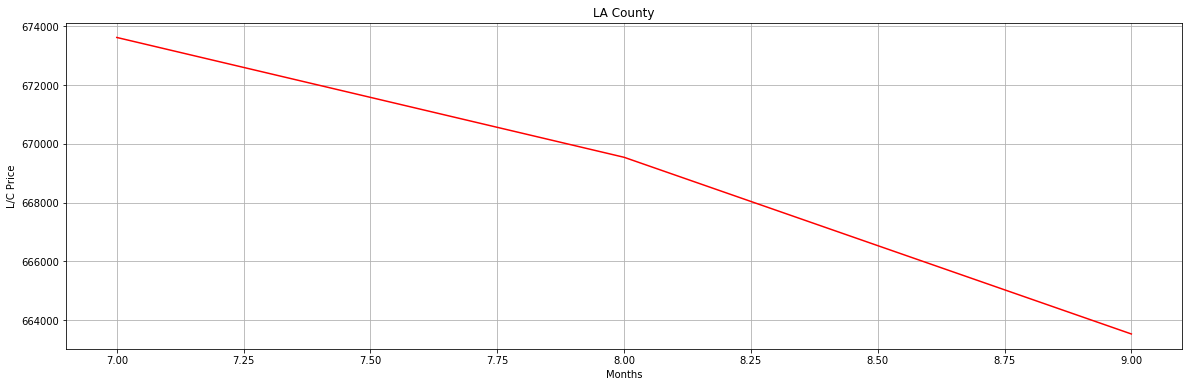

In [51]:
# LA Closed Summer Graph 2019
figure(num=None, figsize=(20,6))
plt.plot(LA_Closed_df['month'], LA_Closed_df['L/C Price'], color = "red")
plt.title("LA County")
plt.xlabel("Months")
plt.ylabel("L/C Price")
plt.grid()

In [55]:
RC_Closed_df = summer_closed_RC.groupby(['County ', 'month']).mean().reset_index()
RC_Closed_df

,County,month,L/C Price
0,Riverside,7.0,460916.970509
1,Riverside,8.0,440446.110315
2,Riverside,9.0,438876.135609


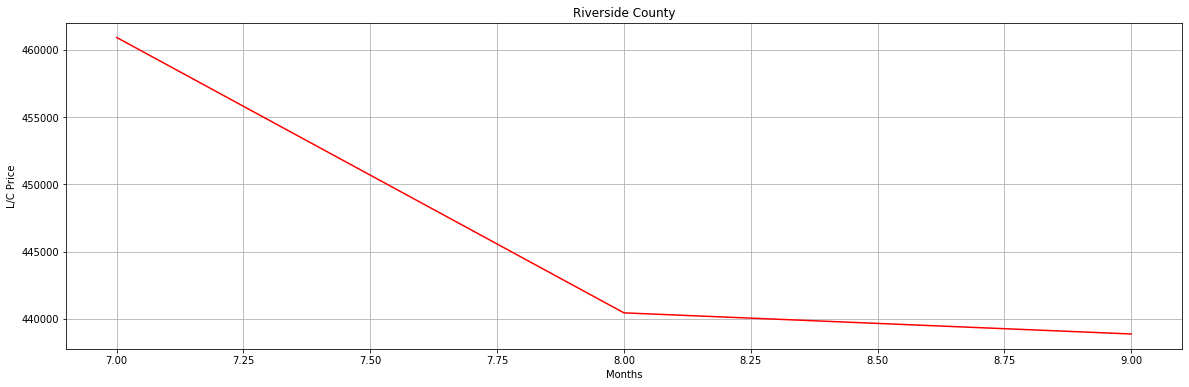

In [71]:
# Riverside County Closed Graph 2019
figure(num=None, figsize=(20,6))
plt.plot(RC_Closed_df['month'], RC_Closed_df['L/C Price'], color = "red")
plt.title("Riverside County")
plt.xlabel("Months")
plt.ylabel("L/C Price")
plt.grid()

In [57]:
OC_Closed_df = summer_closed_OC.groupby(['County ', 'month']).mean().reset_index()
OC_Closed_df

,County,month,L/C Price
0,Orange,7.0,836414.490964
1,Orange,8.0,828147.472422
2,Orange,9.0,846740.221239


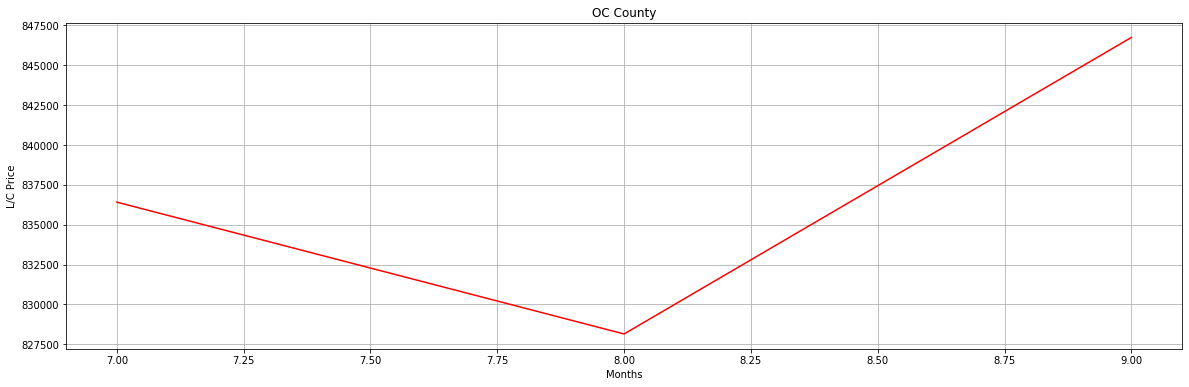

In [58]:
# Orange County Closed Graph 2019
figure(num=None, figsize=(20,6))
plt.plot(OC_Closed_df['month'], OC_Closed_df['L/C Price'], color = "red")
plt.title("OC County")
plt.xlabel("Months")
plt.ylabel("L/C Price")
plt.grid()

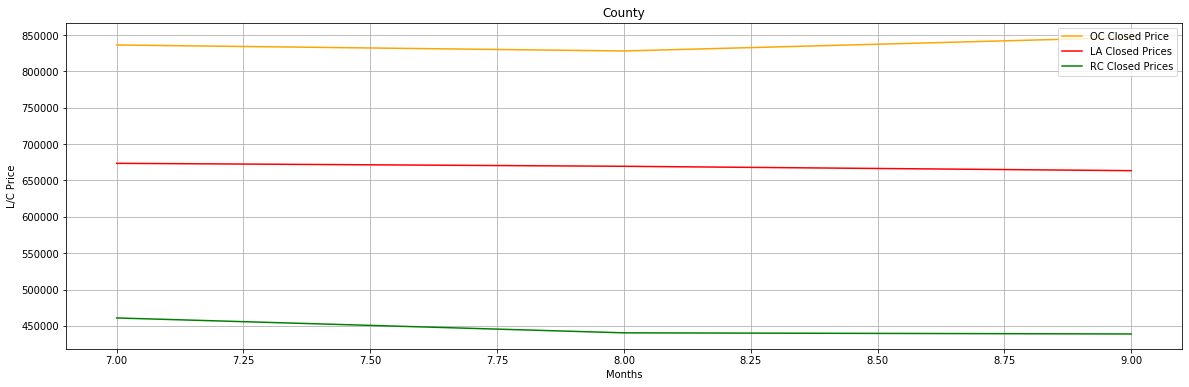

In [84]:
#All Counties_Closed Graph 2019

figure(num=None, figsize=(20,6))
plt.plot(OC_Closed_df['month'], OC_Closed_df['L/C Price'], color = "orange", label = "OC Closed Price")
plt.plot(LA_Closed_df['month'], LA_Closed_df['L/C Price'], color = "red", label = "LA Closed Prices")
plt.plot(RC_Closed_df['month'], RC_Closed_df['L/C Price'], color = "green", label = "RC Closed Prices")
plt.legend(loc = "upper right")
plt.title("County")
plt.xlabel("Months")
plt.ylabel("L/C Price")
plt.grid()

In [54]:
summer_current_LA.head()

,Listing ID,L/C Price,month,County
0,OC19161856,1174000.0,7,Los Angeles
1,PW19166323,1995000.0,7,Los Angeles
2,PW19182226,989000.0,7,Los Angeles
3,PW19210987,1195000.0,7,Los Angeles
4,PW19170855,1299000.0,7,Los Angeles


In [60]:
LA_Current_df = summer_current_LA.groupby(['County', 'month']).mean().reset_index()
LA_Current_df

,County,month,L/C Price
0,Los Angeles,7,811655.043143
1,Los Angeles,8,749357.903733
2,Los Angeles,9,731109.385934


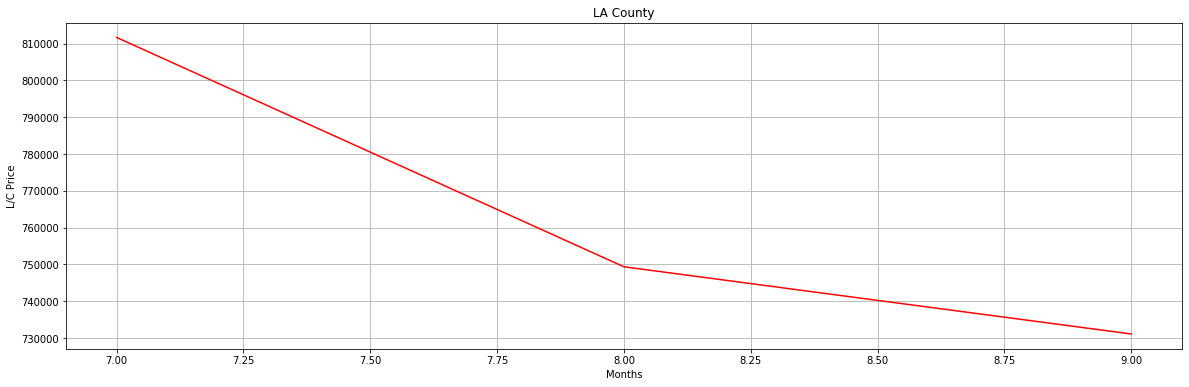

In [62]:
# LA County Current Graph 2019
figure(num=None, figsize=(20,6))
plt.plot(LA_Current_df['month'], LA_Current_df['L/C Price'], color = "red")
plt.title("LA County")
plt.xlabel("Months")
plt.ylabel("L/C Price")
plt.grid()

In [63]:
RC_Current_df = summer_current_RC.groupby(['County', 'month']).mean().reset_index()
RC_Current_df

,County,month,L/C Price
0,Riverside,7,471670.487859
1,Riverside,8,468468.174855
2,Riverside,9,466612.539963


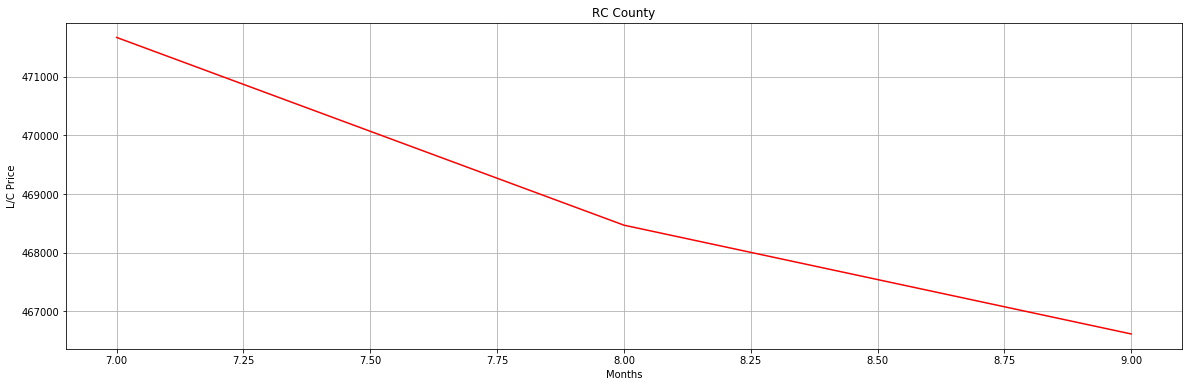

In [64]:
# Riverside County Current Graph 2019
figure(num=None, figsize=(20,6))
plt.plot(RC_Current_df['month'], RC_Current_df['L/C Price'], color = "red")
plt.title("RC County")
plt.xlabel("Months")
plt.ylabel("L/C Price")
plt.grid()

In [65]:
OC_Current_df = summer_current_OC.groupby(['County', 'month']).mean().reset_index()
OC_Current_df

,County,month,L/C Price
0,Orange,7,1.010912e+06
1,Orange,8,9.524297e+05
2,Orange,9,9.391803e+05


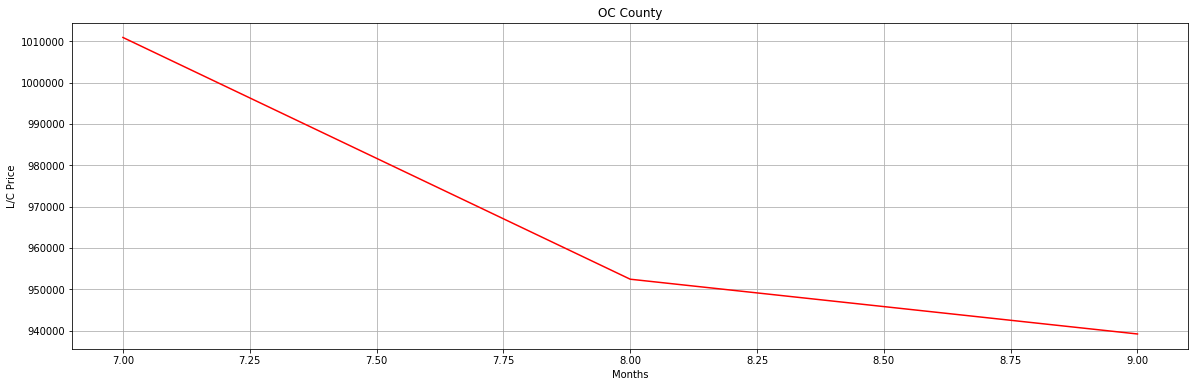

In [66]:
# OC Current Graph 2019
figure(num=None, figsize=(20,6))
plt.plot(OC_Current_df['month'], OC_Current_df['L/C Price'], color = "red")
plt.title("OC County")
plt.xlabel("Months")
plt.ylabel("L/C Price")
plt.grid()

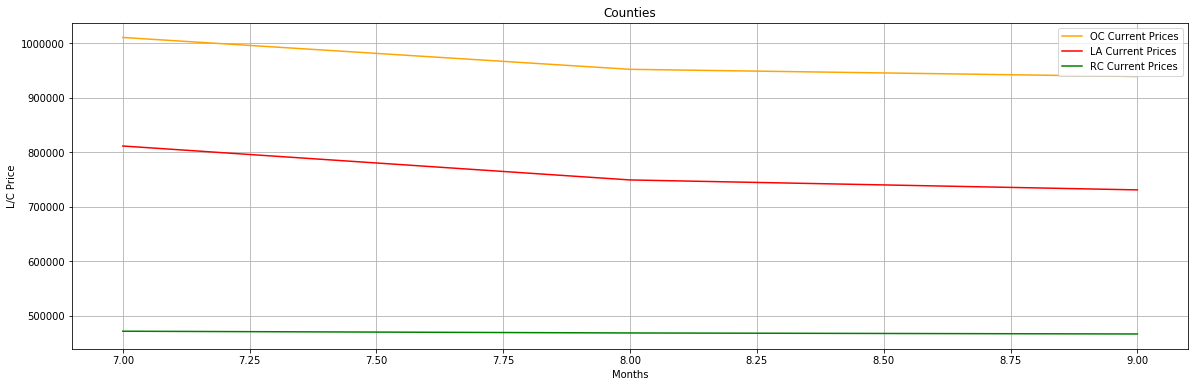

In [83]:
#All Counties_Current Graph 2019
figure(num=None, figsize=(20,6))
plt.plot(OC_Current_df['month'], OC_Current_df['L/C Price'], color = "orange", label= "OC Current Prices")
plt.plot(LA_Current_df['month'], LA_Current_df['L/C Price'], color = "red", label= "LA Current Prices")
plt.plot(RC_Current_df['month'], RC_Current_df['L/C Price'], color = "green", label= "RC Current Prices")
plt.legend(loc = "upper right")
plt.title("Counties")
plt.xlabel("Months")
plt.ylabel("L/C Price")
plt.grid()

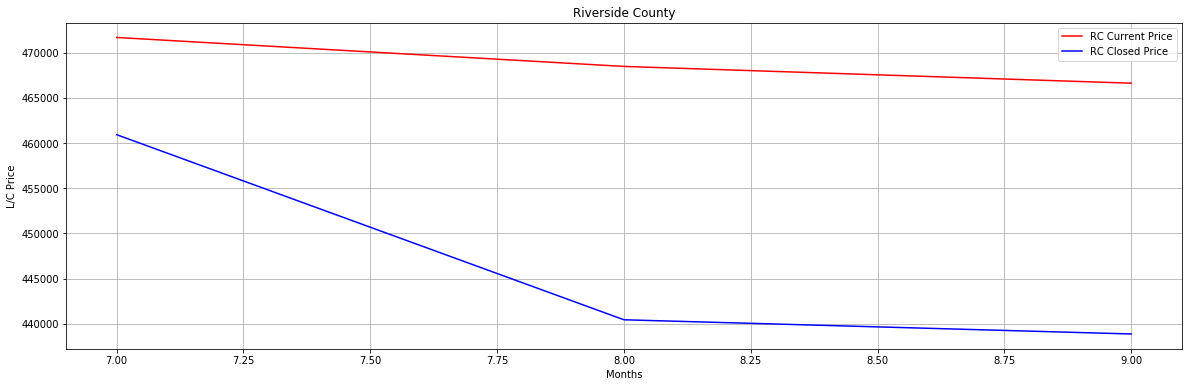

In [81]:
RC_Closed_df
RC_Current_df

# RC Comparison Graph 2019
figure(num=None, figsize=(20,6))
plt.plot(RC_Current_df['month'], RC_Current_df['L/C Price'], color = "red", label="RC Current Price")
plt.plot(RC_Closed_df['month'], RC_Closed_df['L/C Price'], color = "blue", label="RC Closed Price")
plt.legend(loc = "upper right")
plt.title("Riverside County")
plt.xlabel("Months")
plt.ylabel("L/C Price")
plt.grid()

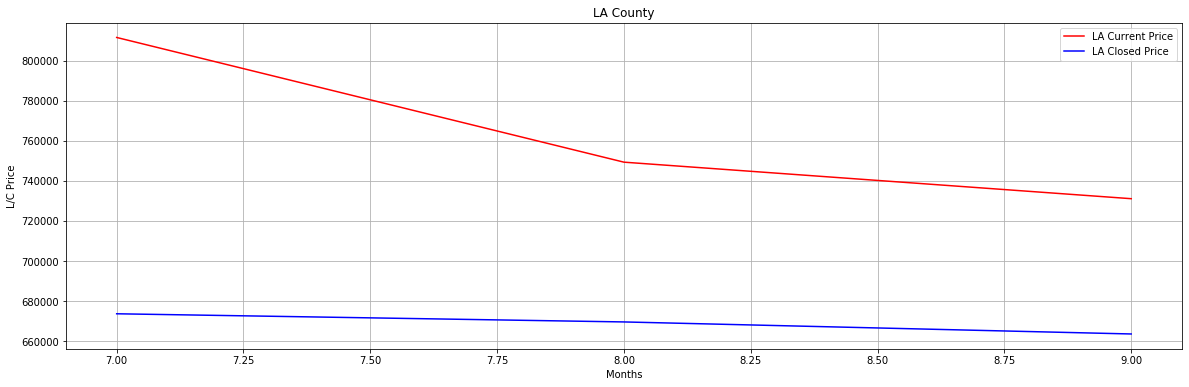

In [78]:
LA_Closed_df
LA_Current_df

# RC Comparison Graph 2019
figure(num=None, figsize=(20,6))
plt.plot(LA_Current_df['month'], LA_Current_df['L/C Price'], color = "red", label="LA Current Price")
plt.plot(LA_Closed_df['month'], LA_Closed_df['L/C Price'], color = "blue", label="LA Closed Price")
plt.legend(loc = "upper right")
plt.title("LA County")
plt.xlabel("Months")
plt.ylabel("L/C Price")
plt.grid()

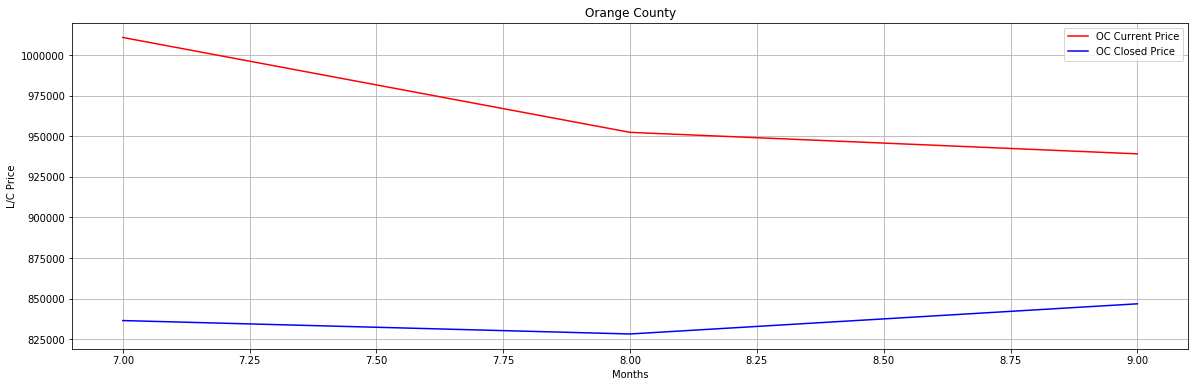

In [77]:
OC_Closed_df
OC_Current_df

# RC Comparison Graph 2019
figure(num=None, figsize=(20,6))
plt.plot(OC_Current_df['month'], OC_Current_df['L/C Price'], color = "red", label="OC Current Price")
plt.plot(OC_Closed_df['month'], OC_Closed_df['L/C Price'], color = "blue", label= "OC Closed Price")
plt.legend(loc = "upper right")
plt.title("Orange County")
plt.xlabel("Months")
plt.ylabel("L/C Price")
plt.grid()

In [89]:
bins = [0, 400000, 800000, 1200000, 1600000, 2000000]
group_names = ['0 <400,000', '400,000-800,000', '800,000-1,200,000', '1,200,000-1,600,000', '1,600,000-2,000,000']



In [93]:
#Binning LA County
summer_closed_LA[''] =pd.cut(summer_closed_LA["L/C Price"], bins, labels = group_names)
group_closed_LA_data = summer_closed_LA.groupby(['']).count().reset_index()
summer_current_LA[''] =pd.cut(summer_current_LA["L/C Price"], bins, labels = group_names)
group_current_LA_data = summer_current_LA.groupby(['']).count().reset_index()
group_closed_LA_data
group_current_LA_data

,,Listing ID,L/C Price,month,County
0,"0 <400,000",446,446,446,446
1,"400,000-800,000",1853,1853,1853,1853
2,"800,000-1,200,000",675,675,675,675
3,"1,200,000-1,600,000",269,269,269,269
4,"1,600,000-2,000,000",116,116,116,116


In [101]:
#Binning RC 
summer_closed_RC[''] =pd.cut(summer_closed_RC['L/C Price'], bins, labels = group_names)
group_closed_RC_data = summer_closed_RC.groupby(['']).count().reset_index()

summer_current_RC[''] =pd.cut(summer_current_RC['L/C Price'], bins, labels = group_names)
group_current_RC_data = summer_current_RC.groupby(['']).count().reset_index()
group_closed_RC_data
group_current_RC_data

,,Listing ID,L/C Price,month,County
0,"0 <400,000",925,925,925,925
1,"400,000-800,000",1201,1201,1201,1201
2,"800,000-1,200,000",67,67,67,67
3,"1,200,000-1,600,000",24,24,24,24
4,"1,600,000-2,000,000",4,4,4,4


In [104]:
#Binning RC 
summer_closed_OC[''] =pd.cut(summer_closed_OC['L/C Price'], bins, labels = group_names)
group_closed_OC_data = summer_closed_OC.groupby(['']).count().reset_index()

summer_current_OC[''] =pd.cut(summer_current_OC['L/C Price'], bins, labels = group_names)
group_current_OC_data = summer_current_OC.groupby(['']).count().reset_index()
group_closed_RC_data
group_current_RC_data

,,Listing ID,L/C Price,month,County
0,"0 <400,000",925,925,925,925
1,"400,000-800,000",1201,1201,1201,1201
2,"800,000-1,200,000",67,67,67,67
3,"1,200,000-1,600,000",24,24,24,24
4,"1,600,000-2,000,000",4,4,4,4


Text(0, 0.5, 'Closing Prices')

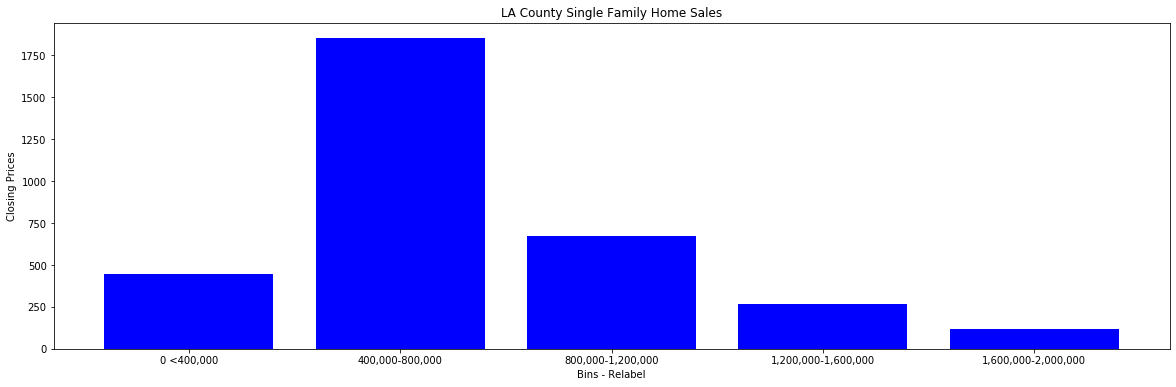

In [114]:
figure(num=None, figsize=(20,6))
group_names = ['0 <400,000', '400,000-800,000', '800,000-1,200,000', '1,200,000-1,600,000', '1,600,000-2,000,000']
bars_LA = group_current_LA_data["L/C Price"]
x_axis = np.arange(len(bars_LA))
plt.bar(x_axis, bars_LA, color="b", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, group_names)
plt.title("LA County Single Family Home Sales")
plt.xlabel("Bins - Relabel")
plt.ylabel("Closing Prices")

Text(0, 0.5, 'Closing Prices')

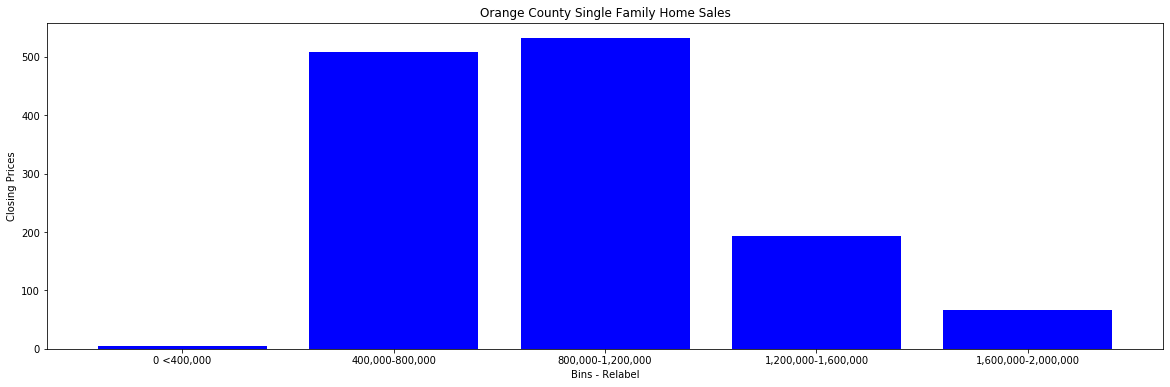

In [116]:
figure(num=None, figsize=(20,6))
group_names = ['0 <400,000', '400,000-800,000', '800,000-1,200,000', '1,200,000-1,600,000', '1,600,000-2,000,000']
bars_OC = group_current_OC_data["L/C Price"]
x_axis = np.arange(len(bars_OC))
plt.bar(x_axis, bars_OC, color="b", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, group_names)
plt.title("Orange County Single Family Home Sales")
plt.xlabel("Bins - Relabel")
plt.ylabel("Closing Prices")

Text(0, 0.5, 'Closing Prices')

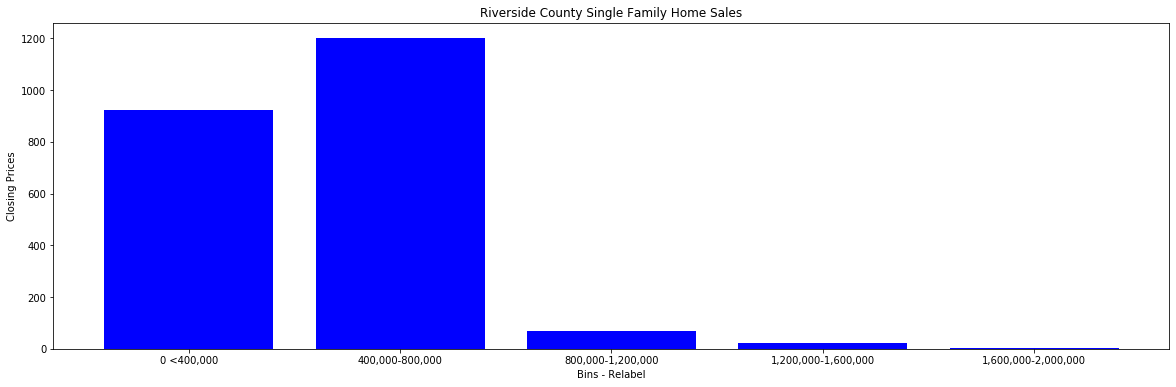

In [117]:
figure(num=None, figsize=(20,6))
group_names = ['0 <400,000', '400,000-800,000', '800,000-1,200,000', '1,200,000-1,600,000', '1,600,000-2,000,000']
bars_RC = group_current_RC_data["L/C Price"]
x_axis = np.arange(len(bars_RC))
plt.bar(x_axis, bars_RC, color="b", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, group_names)
plt.title("Riverside County Single Family Home Sales")
plt.xlabel("Bins - Relabel")
plt.ylabel("Closing Prices")